<a href="https://colab.research.google.com/github/ras1364/Run10SentenceBert/blob/CommentWithoutBreak/SentenceBert8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentence BERT encoder + Without Break + NLP Network.**

In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from string import ascii_lowercase
from collections import Counter
import itertools, nltk, snowballstemmer, re

!pip install transformers
import transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.6 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving X_test8.csv to X_test8.csv
Saving X_train8.csv to X_train8.csv
Saving y_test8.csv to y_test8.csv
Saving y_train8.csv to y_train8.csv


In [4]:
num = "8"
X_test = pd.read_csv("/content/X_test"+num+".csv")
X_train = pd.read_csv("/content/X_train"+num+".csv")
y_test = pd.read_csv("/content/y_test"+num+".csv")
y_train = pd.read_csv("/content/y_train"+num+".csv")

In [5]:
max_length = 384
for x in range(0,len(X_train)):
  line = X_train.loc[x].at["text"]
  if max_length < len(line.split()) :
    max_length = len(line.split())

print(max_length)


749


In [6]:
from gensim.parsing.preprocessing import remove_stopwords

def preprocess(text):
  return remove_stopwords(text)

X_train["stemmed_text_data"] = X_train["text"].map(preprocess)
X_test["stemmed_text_data"] = X_test["text"].map(preprocess)

In [7]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=5cf534d717c488285f839ec4f6625056770ab81215b151e8ebb7e308f9603633
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [8]:
import time

In [9]:
startedTime = time.time()
X_train_encoded = sbert_model.encode(X_train["stemmed_text_data"] ,  show_progress_bar=True)
endTime= time.time()
print("\nTrain Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")
startedTime = time.time()
X_test_encoded = sbert_model.encode(X_test["stemmed_text_data"], show_progress_bar=True)
endTime= time.time()
print("\nTest Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")


Batches:   0%|          | 0/40 [00:00<?, ?it/s]


Train Elapsed Time :  124.89972567558289 sec or  2.081662094593048 min


Batches:   0%|          | 0/10 [00:00<?, ?it/s]


Test Elapsed Time :  25.092344760894775 sec or  0.41820574601491295 min


In [10]:
print("X_train.shape = " , X_train_encoded.shape, " y_train.shape = ", y_train["deceptive"].shape)
print("X_test.shape = " , X_test_encoded.shape, " y_test.shape = ", y_test["deceptive"].shape)

X_train.shape =  (1280, 384)  y_train.shape =  (1280,)
X_test.shape =  (320, 384)  y_test.shape =  (320,)


In [11]:
#y_train

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
# define and fit the final model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
   ]
model = Sequential()
model.add(Dense(64, input_shape=(384,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                24640     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 26,753
Trainable params: 26,753
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_train_final = y_train.deceptive
startedTime = time.time()
model.fit(X_train_encoded,y_train_final, epochs=50, batch_size=64, verbose=1)
endTime= time.time()
print("\nTest Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

Epoch 1/50
20/20 [==============================] - 2s 5ms/step - loss: 0.6822 - accuracy: 0.6195 - precision: 0.5967 - recall: 0.7375
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.7195 - precision: 0.7057 - recall: 0.7531
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7633 - precision: 0.7637 - recall: 0.7625
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7867 - precision: 0.7974 - recall: 0.7688
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8148 - precision: 0.8331 - recall: 0.7875
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8227 - precision: 0.8347 - recall: 0.8047
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8484 - precision: 0.8632 - recall: 0.8281
Epoch 8/50
20/20 [==============================] - 0s 

In [15]:
model.evaluate(X_test_encoded, y_test.deceptive)

10/10 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.8188 - precision: 0.8036 - recall: 0.8438


[0.7454664707183838, 0.8187500238418579, 0.8035714030265808, 0.84375]

In [16]:
y_predicted = model.predict(X_test_encoded)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 0s 4ms/step


In [17]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm

array([[127,  33],
       [ 25, 135]])

Text(50.722222222222214, 0.5, 'Truth')

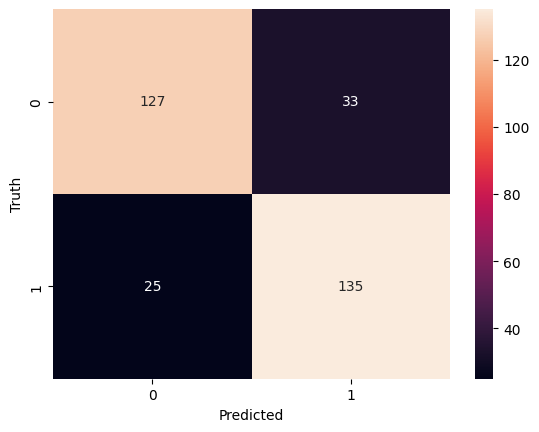

In [19]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       160
           1       0.80      0.84      0.82       160

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

